In [1]:
import math

import jax
import jax.numpy as jnp
from jax import grad, random, vmap

from utils import *
from kernels import *

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<Figure size 640x480 with 0 Axes>

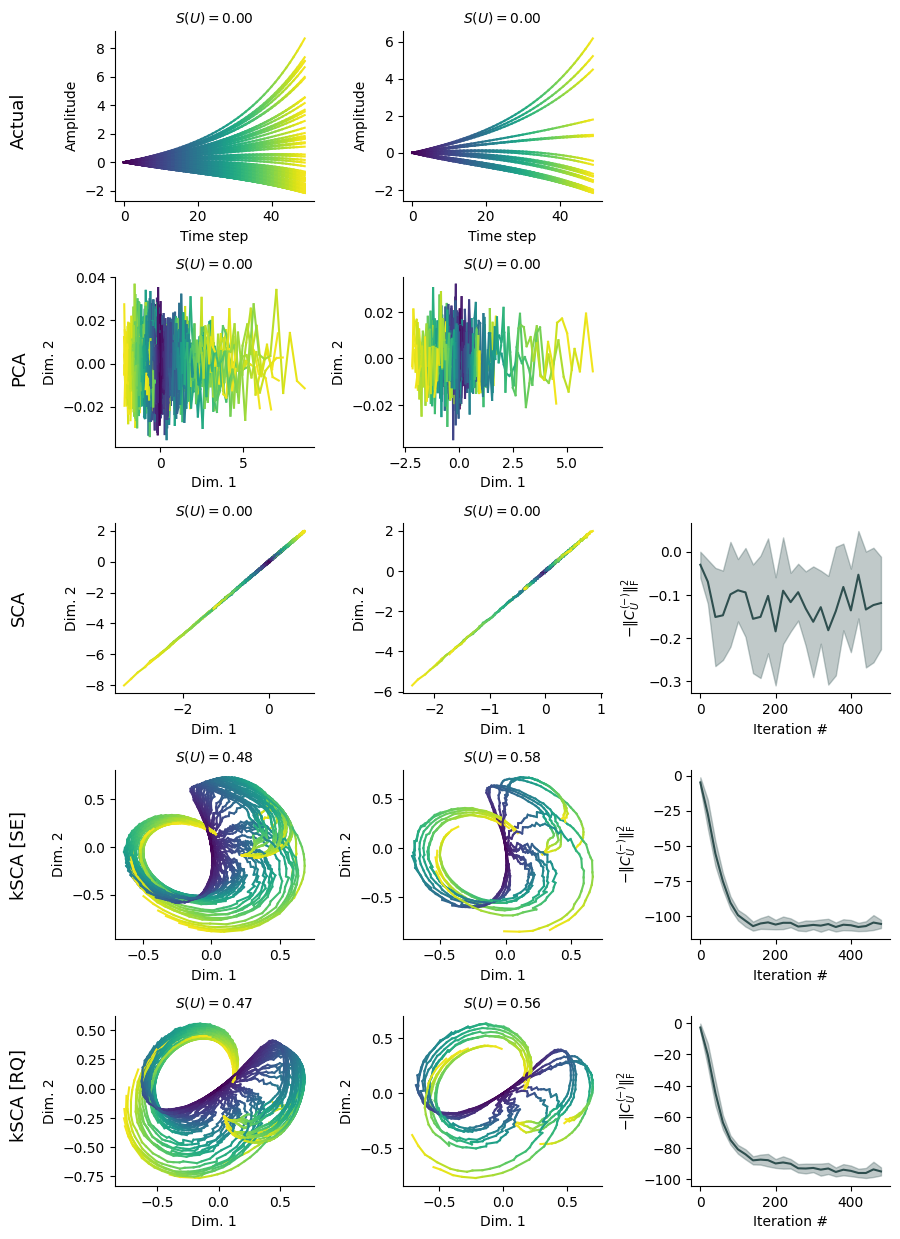

In [22]:

gt_files_rotation = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /X_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /X_test.npy'
]

SCA_files_rotation = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /linear/ls_loss.npy'
]

PCA_files_rotation = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + obs noise /pca/Y_test.npy'
]


gt_files_vdp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/X_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/X_test.npy'
]

SCA_files_vdp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/linear/ls_loss.npy'
]

PCA_files_vdp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/van der pol + obs noise/pca/Y_test.npy'
]


SCA_files_rotation_modes = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + mode/linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + mode/linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + mode/linear/ls_loss.npy'
]

PCA_files_rotation_modes = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + mode/pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/rotation + mode/pca/Y_test.npy'
]


gt_files_infty = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/X_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/X_test.npy'
]

SCA_files_infty = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/linear/ls_loss.npy'
]

PCA_files_infty = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/pca/Y_test.npy'
]

kSCA_SE_files_infty = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/sq exp/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/sq exp/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/sq exp/ls_loss.npy'
]

kSCA_RQ_files_infty = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/rational quadratic/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/rational quadratic/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/infinity + obs noise/rational quadratic/ls_loss.npy'
]

gt_files_exp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/X_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/X_test.npy'
]

SCA_files_exp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/linear/ls_loss.npy'
]

PCA_files_exp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/pca/Y_test.npy'
]

kSCA_SE_files_exp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/sq exp/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/sq exp/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/sq exp/ls_loss.npy'
]

kSCA_RQ_files_exp = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/rational quadratic/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/rational quadratic/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/expansion + obs noise/rational quadratic/ls_loss.npy'
]

gt_files_exp1D = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/X_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/X_test.npy'
]

SCA_files_exp1D = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/linear/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/linear/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/linear/ls_loss.npy'
]

PCA_files_exp1D = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/pca/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/pca/Y_test.npy'
]

kSCA_SE_files_exp1D = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/sq exp/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/sq exp/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/sq exp/ls_loss.npy'
]

kSCA_RQ_files_exp1D = [
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/rational quadratic/Y_train.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/rational quadratic/Y_test.npy',
    '/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/toy datasets/1D exp + obs noise/rational quadratic/ls_loss.npy'
]

def get_toy_plot_1(gt_files, SCA_files, PCA_files, kSCA_SE_files = None, kSCA_RQ_files = None,  id='a', ksca=False, oneD=False):
    fontsize = 10 
    fontsize_big = 13
    def clear_axes(ax):
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    def plot_2D(ax, Y):
        cmap = plt.get_cmap('viridis')  
        num_time_points = Y.shape[-1]
        indices_to_plot = np.arange(0, Y.shape[0], 1)
        for i in indices_to_plot:
            x = Y[i, 0, :]
            y = Y[i, 1, :]
            for t in range(num_time_points - 1):
                ax.plot(x[t:t+2], y[t:t+2], color=cmap(t / (num_time_points - 1)))
        ax.set_xlabel('Dim. 1', fontsize=fontsize)
        ax.set_ylabel('Dim. 2', fontsize=fontsize)

        ax.set_title(r'$S(U) = {:.2f}$'.format(np.abs(compute_S_all_pairs(jnp.array(Y)))), fontsize=fontsize)
    
    def plot_1D(ax, X):
        K, _, T = X.shape
        cmap = plt.get_cmap('viridis')   

        for k in range(K):
            for t in range(T - 1):
                ax.plot([t, t + 1], [X[k, 0, t], X[k, 0, t + 1]], color=cmap(t / (T - 1)))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_ylabel('Amplitude', fontsize=fontsize)
        ax.set_xlabel('Time step', fontsize=fontsize)
        ax.set_title(r'$S(U) = {:.2f}$'.format(np.abs(compute_S_all_pairs(jnp.array(X)))), fontsize=fontsize)

    def plot_loss(loss, row, num_elements = 20): 
        
        steps = list(range(0, len(loss), num_elements))
        mean_loss = np.array([np.mean(loss[i:i+num_elements]) for i in range(0, len(loss ), num_elements)])
        std_loss = np.array([np.std(loss[i:i+num_elements]) for i in range(0, len(loss), num_elements)])
        axes[row, 2].plot(steps, mean_loss, linestyle='-', color='darkslategrey')
        axes[row, 2].fill_between(steps, mean_loss - std_loss, mean_loss + std_loss, color='darkslategrey', alpha=0.3)
        axes[row, 2].set_xlabel('Iteration #', fontsize=fontsize)
        axes[row, 2].set_ylabel(r"$ -\|C_{U}^{(-)}\|_\mathrm{F}^2$", fontsize=fontsize)
        #axes[2, 2].plot(loss)
        
    if ksca == False: 
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    else: 
        fig, axes = plt.subplots(5, 3, figsize=(10, 15))

    for i in range(2):
        Y = np.load(gt_files[i])
        if oneD == False:
            plot_2D(axes[0, i], Y)
        else:
            plot_1D(axes[0, i], Y)

    clear_axes(axes[0, 2]) 
    #axes[0, 0].set_title(r'$\boldsymbol{a}$', fontsize=15, loc='left')

    for i in range(2):
        Y = np.load(PCA_files[i])
        plot_2D(axes[1, i], Y)

    clear_axes(axes[1, 2]) 

    for i in range(2):
        Y = np.load(SCA_files[i])
        plot_2D(axes[2, i], Y)

    loss = np.load(SCA_files[-1])
    plot_loss(loss, row = 2)

    if ksca:
        for i in range(2):
            Y = np.load(kSCA_SE_files[i])
            plot_2D(axes[3, i], Y)

        loss = np.load(kSCA_SE_files[-1])
        plot_loss(loss, row = 3)

        for i in range(2):
            Y = np.load(kSCA_RQ_files[i])
            plot_2D(axes[4, i], Y)

        loss = np.load(kSCA_RQ_files[-1])
        plot_loss(loss, row = 4)



    for row in axes:
        for ax in row:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.tick_params(axis='both', which='major', labelsize=fontsize)

    fig.text(0.05, 0.9, id, va='center', rotation='horizontal', fontsize=fontsize_big, fontweight='bold')
    if ksca == False: 
        fig.text(0.05, 0.78, 'Actual', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.05, 0.495, 'PCA', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.05, 0.21, 'SCA', va='center', rotation='vertical', fontsize=fontsize_big)
    else: 
        fig.text(0.02, 0.82, 'Actual', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.02, 0.655, 'PCA', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.02, 0.495, 'SCA', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.02, 0.33, 'kSCA [SE]', va='center', rotation='vertical', fontsize=fontsize_big)
        fig.text(0.02, 0.17, 'kSCA [RQ]', va='center', rotation='vertical', fontsize=fontsize_big)
    plt.subplots_adjust(wspace=0.45, hspace=0.45)

# get_toy_plot_1(gt_files_rotation, SCA_files_rotation, PCA_files_rotation)
# plt.figure()
# get_toy_plot_1(gt_files_vdp, SCA_files_vdp, PCA_files_vdp, 'b')
# plt.figure()
#get_toy_plot_1(gt_files_rotation, SCA_files_rotation_modes, PCA_files_rotation_modes, '')
# plt.figure()
# get_toy_plot_1(gt_files_infty, SCA_files_infty, PCA_files_infty, kSCA_SE_files_infty, kSCA_RQ_files_infty, 'a', ksca=True)
# plt.figure()
# get_toy_plot_1(gt_files_exp, SCA_files_exp, PCA_files_exp, kSCA_SE_files_exp, kSCA_RQ_files_exp, 'b', ksca=True)
plt.figure()
get_toy_plot_1(gt_files_exp1D, SCA_files_exp1D, PCA_files_exp1D, kSCA_SE_files_exp1D, kSCA_RQ_files_exp1D, '', ksca=True, oneD=True)